*Universidade Federal do Rio Grande do Sul*

*Programa de Pós-Graduação em Engenharia Civil*

---
# Análise sísmica pelo método do espectro de resposta
---
*Eng. Me. Daniel B. M. Matos*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_config import *
plot_config()
import Pseudo 
import scipy.interpolate as interpol
import scipy.linalg as sc
import scipy.signal as sig

## 1 Espectro de resposta

Um espectro de resposta pode ser definido como os valores máximos(deslocamento, velocidade ou aceleração) de um sistema de um grau de liberdade em relação ao seu período de oscilação quando submetido a um carregamento externo. Vejamos o sinal Sísmico a seguir criado a partir do espectro de Kanai-Tajimi.

20.0


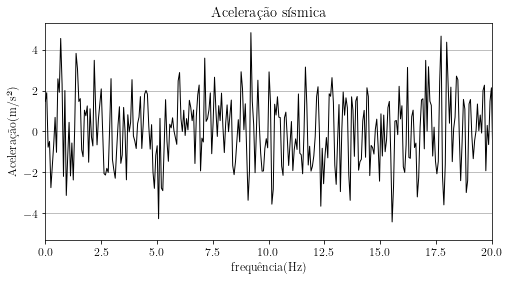

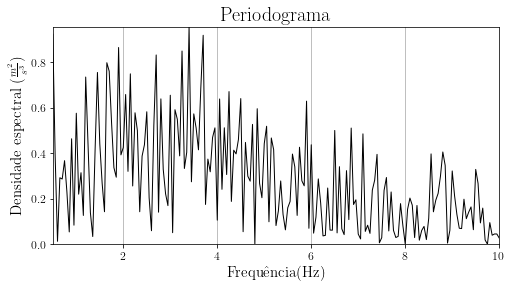

In [2]:
#--------------------------------------------------------------------#
#1 Criação de um sinal temporal a partir do método de Kanai-Tajimi.  #
#--------------------------------------------------------------------#
t,ag,Sg,wg = Pseudo.Kanai_Tajimi(0.5,'rocha',20,0.05)
plt.figure(16,figsize=(8,4))
#--------------------------------------------------------------------#
#2 Plotagem do periodograma do sinal.                                #
#--------------------------------------------------------------------#
f,Saz = sig.periodogram(ag,(len(ag)/np.max(t)))
plt.plot(f,Saz,'k')
plt.xlabel('Frequência(Hz)',size=15); plt.ylabel('Densidade espectral ($ \\frac{m^2}{s^3}$)',size=15);
plt.xlim(0.5,10); plt.title(' Periodograma',size=20)
plt.ylim(0,np.max(Saz))
plt.grid(axis = 'x')
print(len(ag)/np.max(t))

Aplica-se este sinal em vários sistemas de 1 G.D.L, extraindo-se os valores máximos de deslocamento para cada uma das frequências naturais avaliadas. A equação de equilíbrio dinâmico de um sistema de 1 G.D.L está exposta abaixo:

\begin{align}
m\ddot{u}(t)+c\dot{u}(t)+ku(t) &= F(t)
\end{align}

Dividindo ambos os lados pela massa, encontra-se:
\begin{align}
\ddot{u}(t)+2\zeta\omega_n\dot{u}(t)+\omega^2_nu(t) &= \frac{F(t)}{m} = a(t)
\end{align}

Faz-se, então, uma varredura por diversas frequências utilizando o método de Duhamel.


In [3]:
#--------------------------------------------------------------------#
#3 Resolução das equações de equilíbrio dos sistemas de 1GDL         #
#--------------------------------------------------------------------#
wn = np.linspace(0.1,50,1000)
u  = Pseudo.Duhamel(wn,ag,t)


Separa-se, agora, os valores máximos associados a cada frequência natural de oscilação:

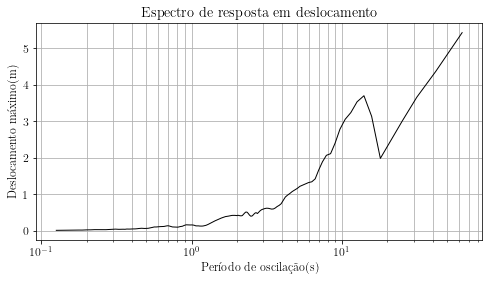

In [4]:
#--------------------------------------------------------------------#
#4 Armazenando o deslocamento máximo de cada sistema                 #
#--------------------------------------------------------------------#
umax = np.zeros(len(wn))
for i in range(len(wn)):
    umax[i] = np.amax(u[i,:])

plt.figure(1,figsize=(8,4))
plt.title('Espectro de resposta em deslocamento')
plt.xscale('log')
plt.plot(2*np.pi/wn,umax,'k')
plt.xlabel('Período de oscilação(s)');plt.ylabel('Deslocamento máximo(m)')
plt.grid(which = 'both')


Uma forma de transformar diretamente os valores do espectro de deslocamento no espectro de aceleração, é multiplicar este pelo quadrado da frequência natural de oscilação, o que resulta no **Espectro de pseudoacelerações**.
\begin{align}
Sa = w_n^2Su
\end{align}

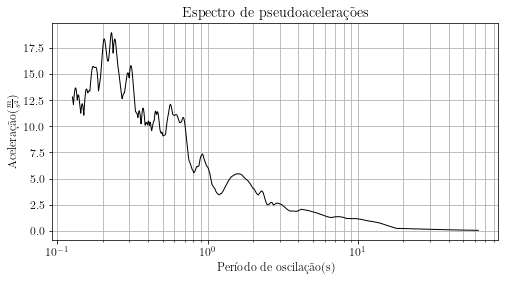

In [5]:
#--------------------------------------------------------------------#
#5 Plotagem do espectro de pseudo acelerações                        #
#--------------------------------------------------------------------#
Sa = wn**2*umax
tn =2*np.pi/wn

Sai =interpol.interp1d(tn,Sa)      # "transformando" uma função discreta em contínua

plt.figure(2,figsize=(8,4))
plt.xscale('log')
plt.plot(tn,Sa,'k')
plt.title('Espectro de pseudoacelerações')
plt.xlabel('Período de oscilação(s)');plt.ylabel('Aceleração($\\frac{m}{s^2}$)')
plt.grid(which = 'both')

#x = np.linspace(0.2,10,50)       # Mostrando a "transformação"
#plt.scatter(x,Sai(x),color='r')

A utilização deste tipo de espectro será melhor visualizada posteriormente no cálculo da **força estática equivalente** de um sismo.

## 2 Força estática equivalente de um sismo

Para o compreendimento dos processos a seguir, é necessário relembrar o processo de análise modal de uma estrutura com múltiplos graus de liberdade. A análise modal permite a resolução de um problema de MGDL a partir da resolução de vários problemas de 1GDL. Este processo se chama desacoplamento das funções de equilíbrio. Isto é possível devido a ortogonalidade dos autovalores e autovetores obtidos da seguinte expressão:

\begin{align}
K\overrightarrow{\phi} = \omega^2 M \overrightarrow{\phi}
\end{align}

Escrevendo o deslocamento total como o somatório dos deslocamentos em cada modo (forma desacoplada), tem-se:

\begin{align}
\overrightarrow{u}(t) = \sum_{n=1}^{N}u_n \overrightarrow{\phi_n}
\end{align}

Em que N é o número de modos da estrutura.

Portanto, pode-se escrever  o equilíbrio modal por meio da seguinte equação:

\begin{align}
M\ddot{u}_n \overrightarrow{\phi_n}+C\dot{u}_n\overrightarrow{\phi_n} + Ku_n\overrightarrow{\phi_n} =\overrightarrow{F}
\end{align}

A força sísmica pode ser calculada pelo produto da Massa associada a cada grau de liberdade, um vetor de projeções e a aceleração sísmica. Reescrevendo, portanto, a equação anterior:

\begin{align}
M\ddot{u}_n \overrightarrow{\phi_n}+C\dot{u}\overrightarrow{\phi_n} + Ku_n\overrightarrow{\phi_n} =-M\overrightarrow{B}a_g
\end{align}

Multiplicando todos os termos da equação pelo transposto do autovetor chega-se a equação de equilíbrio dinâmico desacoplada:

\begin{align}
M_n\ddot{u}_n +C_n\dot{u} + K_nu_n =L_n{a_g}
\end{align}

Em que $M_n,C_n,K_n e L_n$ são os valores modais, que podem ser definidos da seguinte forma:

\begin{align}
M_n&=\overrightarrow{\phi_n}^tM\overrightarrow{\phi_n}\\
C_n&=\overrightarrow{\phi_n}^tC\overrightarrow{\phi_n}\\
K_n&=\overrightarrow{\phi_n}^tK\overrightarrow{\phi_n}\\
L_n&=-\overrightarrow{\phi_n}^tM\overrightarrow{B}\\
\end{align}

Dividindo ambos os lados da equação pela massa modal, tem-se o seguinte:

\begin{align}
\ddot{u}_n+2\zeta\omega_n\dot{u}_n+\omega^2_nu_n &= \frac{L_n}{M_n}{a_g}
\end{align}

Agora, para o cálculo da força estática equivalente, multiplica-se a matriz de rigidez pelo vetor deslocamento:

\begin{align}
\overrightarrow{F_{est}} &= K\overrightarrow{u}
\end{align}

Usando a forma desacoplada do deslocamento, escreve-se:

\begin{align}
\overrightarrow{F_{est}} &= K\sum_{n=1}^{N}\overrightarrow{\phi}_nu_n
\end{align}

Lembrando do problema de autovalores e autovetores mostrado no início deste tópico, pode-se reescrever a equação anterior da seguinte forma:

\begin{align}
\overrightarrow{F_{est}} &= M\sum_{n =1}^{N}\omega^2_n\overrightarrow{\phi}_nu_n
\end{align}

Analisando agora o problema a partir do espectro de resposta, pode-se escrever o deslocamento máximo modal como:

\begin{align}
u_{n,max} &= \frac{L_n}{M_n} Su(\omega_n)
\end{align}

Reescrevendo a equação da força estática equivalente em função do espectro de resposta em deslocamento:

\begin{align}
\overrightarrow{F_{est}} &= Mcomb\left[\omega^2_n\frac{L_n}{M_n} Su(\omega_n)\overrightarrow{\phi}_n\right]
\end{align}

Perceba que é possível substituir o termo $\omega_n^2Su$ pelo espectro de pseudoaceleraçôes:

\begin{align}
\overrightarrow{F_{est}} &= Mcomb\left[\frac{L_n}{M_n} Sa(\omega_n)\overrightarrow{\phi}_n\right]
\end{align}

Visto que os valores máximos nem sempre ocorrem no mesmo instante de tempo, substitui-se o somatório por uma determinada combinação de modos. As combinações mais usais e recomendadas em códigos normativos são:

### 2.1 Square root of the sum of squares (SQRSS)

Esse procedimento é baseado na teoria de vibração aleatória e fornece melhores resultados do que o processo de somatório convencional. Subestima, contudo, valores extremos em decorrência de frequências naturais próximas uma das outras, como em caso de $w_{j+1}/w_j < 1,4$. A Equação abaixo demonstra o procedimento desta combinação.

\begin{align}
\overrightarrow{u}_{max} &= \sqrt{\sum_i\overrightarrow{u}_{i,max}^2}
\end{align}

### 2.2 Complete quadratic combination(CQC)

Esse procedimento é também baseado na teoria de vibração aleatória, mas diferentemente do anterior, leva em consideração a correlação entre o i-ésimo e o j-ésimo modos naturais de vibração, através do coeficiente de correlação $\rho_{jk}$. Este método pode ser escrito por meio da Equação abaixo.

\begin{align}
\overrightarrow{u}_{max} &= \sqrt{\sum_i\sum_j\rho_{ij}\overrightarrow{u}_{i,max}\overrightarrow{u}_{j,max}}
\end{align}
Entre outras formas apresentadas na literatura para esse coeficiente de correlação, tem-se a apresentada na Equação:
\begin{align}
\rho_{ij}=\frac{8\zeta(1+\beta{ij})\beta{ij}^\frac{3}{2}}{(1-\beta{ij}^2)^2+4\zeta^2\beta{ij}(1+\beta{ij})^2}
\end{align}
Em que $\beta{ij} = \frac{\omega_i}{\omega_j}$.

É importante ressaltar que essa formulação só é válida para fatores de amortecimento iguais em todos os modos.

O uso da combinação CQC se mostra ideal quando existem frequências naturais próximas. A estimativa de resultado com o procedimento CQC se aproxima da estimativa do resultado com o procedimento SRSS, e em caso de amortecimento nulo para todos os modos, o procedimento CQC recai no de SQRSS.

### 2.3 Fator de contribuição modal

Para saber quantos modos são suficientes para realizar a análise estrutural, utiliza-se o fator de contribuição modal. Este fator estima a quantidade de massa que está relacionada à aquele modo de vibração e pode ser escrito como exposto abaixo.

\begin{align}
W_n = \frac{\left(\frac{L_n^2}{M_n}\right)}{M_t}
\end{align}

Vale ressaltar que a massa total da estrutura pode ser calculada como:
\begin{align}
M_t &= \sum_{n=1}^{N}\frac{L_n^2}{M_n}
\end{align}

A formulação acima corresponde a soma dos termos na diagonal da matriz de massa. O número de modos necessário é atingido quando a soma das contribuições modais é maior que 90% (parâmetro normativo).

## 3 Exemplo de aplicação

Definir os deslocamentos máximos no domínio do tempo e pelo método espectral

<img src="exemplo.jpg" alt="drawing" width="400"/>

Primeiramente, definem-se as matrizes de rigidez e massa conforme o problema apresentado

In [6]:
# determinar as matrizes de rigidez e massa
k = 7000
m = 20
K = np.array([[2*k,-k, 0],
              [-k,2*k,-k],
              [0,-k, 1*k]])

M = np.array([[m,0,0],
              [0,m,0],
              [0,0,m]])

A partir dessas matrizes, é possível solucionar o problema de autovalores e autovetores, definindo-se, assim, as frequências naturais de vibração e os seus respectivos modos. É válido ressaltar que não há a necessidade de realizar esse processo para o cálculo do deslocamento máximo no domínio do tempo, a não ser que a matriz de amortecimento seja definida com base nos autovalores da estrutura.

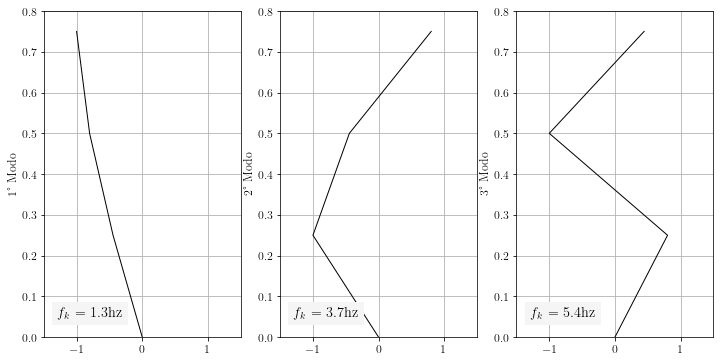

In [7]:
# Calcular os autovalores e autovetores
w21,Phi1 = sc.eig(K,M)

iw   = w21.argsort()
w21  = w21[iw]          ## Garantindo a ordem dos autovalores e autovetores
Phi1 = Phi1[:,iw]
wr   = np.real(w21)
wk   = np.sqrt(wr)
fk   = (wk/(2*np.pi))


# Plotagem das formas modais
f1 = plt.figure(1, figsize=(12,6))
x  = np.arange(0, 8, 2)/8

for k in range(3):
    
    qk     = np.zeros(4)
    qk[1:] = Phi1[:,k]
    qk    /= np.max(np.abs(qk))   
    
    plt.subplot(1,3,k+1)
    plt.plot(qk, x,color ='k')
    
    plt.ylim( 0.0, 0.8);
    plt.xlim(-1.5,  1.5);  plt.ylabel('{}° Modo'.format(str(k+1)));
    plt.text(-1.3, 0.05, '$f_k$ = {0:3.1f}hz'.format(fk[k]),backgroundcolor = 'whitesmoke',size = 'large',color ='black');
    plt.grid(True)

De posse dos modos de vibração, é possível definir os valores modais que serão utilizados no cálculo da resposta máxima a partir do espectro de pseudoacelerações.

In [8]:
# definir os valores modais

Kn = np.diag(Phi1.T@K@Phi1)
Mn = np.diag(Phi1.T@M@Phi1)
Ln = -Phi1.T@M@np.ones(3)

#Fator de participação de massa
Mt = np.sum(Ln**2/Mn)
Wi = 0
i  = 0

while Wi<= 0.9:

        Wi+= (Ln[i]**2/Mn[i])/Mt
        i+=1      
        
print('Número de modos necessários =',i,'\n','Wi ={0:5.2f}%'.format(Wi*100))

Número de modos necessários = 1 
 Wi =91.41%


Percebe-se que o primeiro modo da estrutura já representa 90% da massa total, o que já seria suficiente para a realização da análise segundo diversos códigos normativos. Como o objetivo é comparar com as repostas obtidas no domínio do tempo, utilizar-se-ão todos os modos para a realização da análise. De posse dos valores modais, realiza-se uma análise do domínio do tempo para cada uma das equações desacopladas, a fim de ilustrar que os valores máximos ocorrem em instantes diferentes em cada modo, tornando extremamente conservador a soma desses valores.

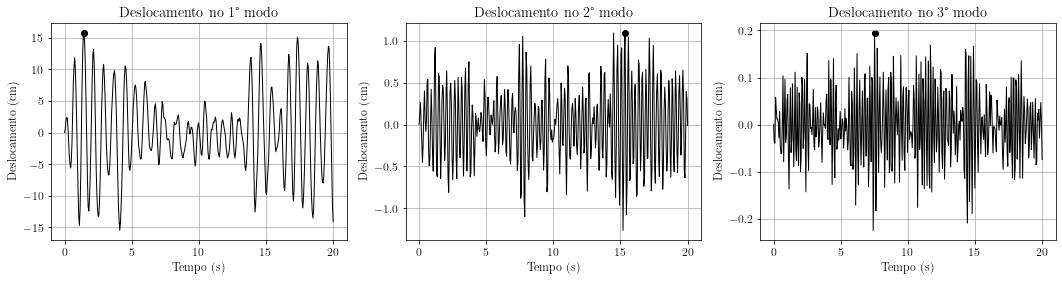

In [9]:
wnm = np.sqrt(Kn/Mn)
uM  = np.zeros((3,len(t))) 
for i in range(3):
    uM[i,:]  = Pseudo.Duhamel(wnm,Ln[i]/Mn[i]*ag,t)[i,:]

utot = Phi1@uM    
plt.figure(20,figsize =(18,4))
c = ['r','b','g']
for i in range(3):
    
    plt.subplot(1,3,i+1)
    plt.plot(t,uM[i,:]*100,color = 'k')
    
    uMmax  = np.amax(uM[i,:])
    nm =np.argmax(uM[i,:])
    plt.title('Deslocamento no {}° modo'.format(i+1))
    plt.scatter(t[nm],uMmax*100,color ='k')
    plt.xlabel('Tempo (s)');plt.ylabel('Deslocamento (cm)')
    plt.grid(True)


O procedimento a seguir calcula a força estática equivalente para cada um dos modos de vibração e seus respectivos deslocamentos, que posteriormente serão combinados pelos métodos SQRSS e CQC. É importante ressaltar que todo princípio estático é válido para o cálculo no domínio modal, ou seja, é possível calcular deslocamentos, esforços cortantes e momento fletores, que posteriormente devem ser combinados para se obter a resposta total. **Não é válido calcular qualquer uma das grandezas citadas anteriormente se os modos já estiverem combinados**.

In [10]:
# Calcular a força estática equivalente
Festn = np.zeros((3,3))
for i in range(3):
    Sax = Sai(1/fk[i])
    Festn[:,i] = M@(Ln[i]/Mn[i]*Sax*Phi1[:,i])

In [11]:
# Calcular deslocamentos modais
Um  = np.linalg.solve(K,Festn)

# SQRSS
usqrss = np.sqrt(np.sum(Um**2,1))

#CQC

ucqc = np.zeros(3)
n = len(Um[0,:])
for i in range (3):
    for j in range (3):
        if j>=i:
            bij = wk[i]/wk[j]
            pij = (8*0.05**2*(1+bij)*bij**(1.5))/((1-bij**2)**2+4*0.05**2*bij
            *(1+bij)**2)
            ucqc+= pij*Um[:,i]*Um[:,j]
            
ucqc = np.sqrt(ucqc)

Calculam-se agora os deslocamentos máximos pelo método de Newmark.

In [12]:
# Definindo a matriz de amortecimento de Rayleigh
zeta    =np.zeros(2)
zeta[0] = 0.05
zeta[1] = 0.05
a0      = 2*(wk[0]*wk[1])/(wk[1]**2 - wk[0]**2)
a1      = a0*( zeta[0]*wk[1] - zeta[1]*wk[0])
a2      = a0*(-zeta[0]/wk[1] + zeta[1]/wk[0])        

Cr  = a1*M + a2*K 

#------------------------------------------------------------------------- 
#1. Criação dos arrays necessários
#-------------------------------------------------------------------------   
Kr       = K
Mr       = M
B        = np.ones((3,1))
age      = np.zeros((1,len(t)))
age[0,:] = ag
F1       = -np.dot(B.T,M)
F        = np.dot(F1.T,age)
tf       = int(len(t))
n        = len(F[:,0])
A        = np.zeros((n,tf))
v        = np.zeros((n,tf))
d        = np.zeros((n,tf))
dt       = t[1]-t[0]
    
#------------------------------------------------------------------------- 
#2. Determinação das constantes do método de Newmark
#-------------------------------------------------------------------------
delta = 0.5
alfa  = 0.25
a0    = 1/(alfa*(dt**2))
a1    = 1/(alfa*dt)
a2    = (1/(2*alfa))-1
a3    = delta/(dt*alfa)
a4    = delta/alfa - 1
a5    = (dt/2)*(delta/alfa - 2)

A[:,0] = np.dot(np.linalg.inv(Mr),(F[:,0]-np.dot(Cr,
         v[:,0])-np.dot(Kr,d[:,0])))
    
d4 = a0*Mr + a3*Cr + Kr
D  = np.linalg.inv(d4)
#------------------------------------------------------------------------- 
#3. Resolução da equação de equilíbrio dinâmico
#-------------------------------------------------------------------------
for i in range(tf-1):
    d1       = np.dot(Mr,(a0*d[:,i]+ a1*v[:,i] + a2*A[:,i]))
    d2       = np.dot(Cr,(a3*d[:,i]+ a4*v[:,i] + a5*A[:,i]))
    d3       = F[:,i+1]+ d1 + d2
    d[:,i+1] = np.dot(D,d3)
    v[:,i+1] = a3*(d[:,i+1] - d[:,i]) - a4*v[:,i] - a5*A[:,i]
    A[:,i+1] = a0*(d[:,i+1] - d[:,i]) - a1*v[:,i] - a2*A[:,i]
    

In [13]:
Ud = np.zeros(3)
for i in range(3):
    Ud[i] = np.max(np.abs(d[i,:]))

A comparação dos resultados pode ser visualizada abaixo.

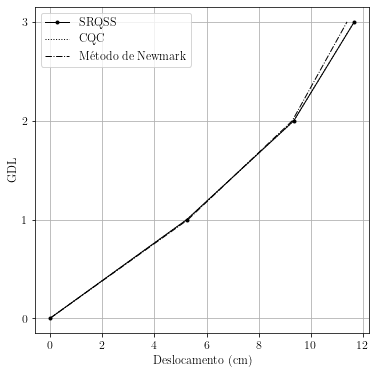

In [14]:
q      = np.arange(4)
U1     = np.zeros(4)
U2     = np.zeros(4)
U3     = np.zeros(4)
U1[1:] = usqrss
U2[1:] = Ud
U3[1:] = ucqc


plt.figure(1,figsize=(6,6))
plt.plot(U1*100,q,'k.-',label ='SRQSS')
plt.plot(U3*100,q,'k:',label ='CQC')
plt.plot(U2*100,q,'k-.',label ='Método de Newmark')
plt.yticks([0,1,2,3])
plt.xlabel('Deslocamento (cm)');plt.ylabel('GDL');plt.legend();
plt.grid(True)

## 3 Análise pelo espectro de potência

Nesta seção, será realizada a análise sísmica por meio do espectro de Kanai-Tajimi utilizado na seção 1. A dedução das equações utilizadas é melhor apresentada nos capítulos 23 e 28 do livro ***Dynamics of Structures*** de Clough e Penzien. Nesta cenário, não serão considerados os espectros modais cruzados, visto que os modos são bem seperados e que essas parcelas não contribuem significativamente para a resposta final.

O espectro de deslocamento modal é definido pelo produto do espectro de forças modais pela função de admitância mecânica:

\begin{align}
S(\omega)_{UmUm} &= |H_m(\omega)|^2S(\omega)_{PmPm}
\end{align}

Onde a função de admitância mecânica e o espectro de forças modais podem ser escritos como:

\begin{align}
|H(\omega)|^2 &= \frac{1}{K_1^2\left[1+(4\zeta^2-2)(\frac{\omega}{\omega_m})^2 +(\frac{\omega}{\omega_m})^4 \right]}\\
S(\omega)_{PmPm} &= S_g(\omega)\phi_m^TMBB^TM\phi_m
\end{align}

O valor R.M.S modal, visto que a média do processo é nula, corresponde ao desvio padrão do modo, que pode ser calculado como a raiz quadrada da integral do espectro de potência.

\begin{align}
\sigma_m &=\left[\int_0^\infty{S(\omega)_{UmUm}d\omega}\right]^\frac{1}{2}
\end{align}

\begin{align}
U_{rms} &= \sum_{m=1}^{N}\sigma_m\phi_m
\end{align}

Da mesma forma que o realizado na análise pelo espectro de resposta, pode-se substituir o somatório por uma combinação dos modos.




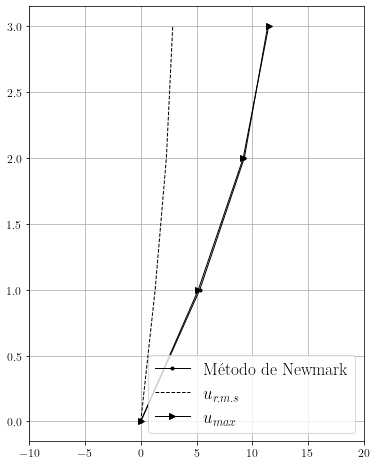

In [15]:
n     = len(Phi1[:,0])
SPP   = np.zeros((n,len(wg)))
Hii   = np.zeros((n,len(wg)))
Szz   = np.zeros((n,len(wg)))
sigma = np.zeros(n)
zeta  = [0.05,0.05,0.0623] 

for i in range(n):
    
    SPP[i,:] = Sg*((Phi1[:,i].T@M@B)@(B.T@M@Phi1[:,i]))
    Hii[i,:] = 1/(Kn[i]**2*(1+(4*zeta[i]**2-2)*(wg/wk[i])**2+(wg/wk[i])**4))
    Szz[i,:] = Hii[i,:]*SPP[i,:]
    sigma2   = np.trapz(Szz[i,:],wg)
    sigma[i] = np.sqrt(sigma2)

q1       = np.zeros((4,3))
q1[1:,:] = Phi1 
Urms     = np.sqrt((sigma[0]*q1[:,0])**2+(sigma[1]*q1[:,1])**2+(sigma[2]*q1[:,2])**2)

plt.figure(2,figsize=(6,8))

plt.plot(U2*100,q,'k.-',label ='Método de Newmark')
plt.plot(Urms*100,q,'k--',label = '$u_{r.m.s}$')
plt.plot(4*Urms*100,q,'k->',label = '$u_{max}$')
plt.xlim(-10,20)
plt.legend(fontsize="x-large",loc = 'lower right')
plt.grid(True)